In [3]:
# Ejup Hoxha
# --------------------
# PLA
# Pocket PLA
# Linear Regression
# Logistic Regression

import numpy as np
import pandas as pd
import time
from numpy import linalg as la
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import copy
import random

np.set_printoptions(precision=3)

In [ ]:
class Perceptron(object):

    def __init__(self):
        None

    # PLA - Not needed for this homework
    def PLA(self, X, W, Y):
        while(float(self.check_accuracy(X, W, Y)) < 1):
            for i in range(len(X)):
                y_predict = self.predict(X[i], W)
                error = Y[i] - y_predict
                W = W + error * X[i]
        return W

    # Pocket PLA
    def pocket_PLA(self, X, W, Y, X_test, Y_test, epochs=10):
        iteration = 0
        best_w = copy.deepcopy(W)

        test_accuracy = self.check_accuracy(X_test, W, Y_test)
        current_accuracy = self.check_accuracy(X, W, Y)
        best_accuracy = current_accuracy

        E_out = np.zeros([epochs, 2])
        E_in = np.zeros([epochs, 2])             
        E_in[0] = np.array([iteration, current_accuracy])
        E_out[0] = np.array([iteration, test_accuracy])

        while(iteration < epochs):
            accrc = 0
            for i in range(len(X)):
                y_predict = self.predict(X[i], W)   # predict a single point
                error = Y[i] - y_predict
                W = W + error * X[i]
                current_accuracy = self.check_accuracy(X, W, Y)
                if current_accuracy > best_accuracy:
                    test_accuracy = self.check_accuracy(X_test, W, Y_test)
                    best_accuracy = current_accuracy
                    best_w = copy.deepcopy(W)   
            E_out[iteration] = np.array([iteration, test_accuracy])
            E_in[iteration] = np.array([iteration, best_accuracy])
            iteration += 1
        return best_w, E_in, E_out

    # change this to vector
    # Predict the outcome of a datapoint
    def predict(self, X, W):
        return 1 if W.T.dot(X) >= 0 else 0

    # Checks the accuracy in the training data - loops - not efficient
    def check_accuracy(self, X, W, Y):
        tot_hit = 0.0
        for i in range(len(X)):
            error = Y[i] - self.predict(X[i], W)
            if error == 0:
                tot_hit += 1
        accuracy = float(tot_hit/len(X)) ## Get percentage
        # print("Accuracy: {0}%".format(accuracy*100.0))
        return accuracy

    # this is slower in this case, and it's strange!!!
    def check_accuracy_vect(self, X, W, Y):
        predictions = np.sign(np.dot(X, W))
        predictions[predictions==-1] = 0
        error = sum((predictions - Y) != 0)
        accuracy = 1-error/len(Y)
        return accuracy

    # Returns the weights calculated using Pseudo-Inverse
    def linear_regression(self, X, Y):
        return (np.linalg.inv(X.T @ X) @ X.T) @ Y

        

In [ ]:
## Breast Cancer Data Experiments ##

# 2 classes, 30 features, 569 datapoints
bcancer = load_breast_cancer()
X_bcancer = np.asarray(bcancer.data) 
X_bias = np.ones([len(X_bcancer),1])             # Add the bias
X_bcancer = np.hstack((X_bias, X_bcancer))            
Y_bcancer = np.asarray(bcancer.target)           # Target function - label
Y_label_names = bcancer.target_names             # [ 0 = 'malignant', 1 = 'benign']

# Divide data in 5 different samples:

# 90%/10% - training/testing
X_train1 = copy.deepcopy(X_bcancer[0:512,:])      
Y_train1 = copy.deepcopy(Y_bcancer[0:512])
X_test1 = copy.deepcopy(X_bcancer[512:568,:])      
Y_test1 = copy.deepcopy(Y_bcancer[512:568])
# 80%/20% - training/testing
X_train2 = copy.deepcopy(X_bcancer[0:455,:])      
Y_train2 = copy.deepcopy(Y_bcancer[0:455])
X_test2 = copy.deepcopy(X_bcancer[455:568,:])      
Y_test2 = copy.deepcopy(Y_bcancer[455:568])
# 70%/30% - training/testing
X_train3 = copy.deepcopy(X_bcancer[0:398,:])      
Y_train3 = copy.deepcopy(Y_bcancer[0:398])
X_test3 = copy.deepcopy(X_bcancer[398:568,:])      
Y_test3 = copy.deepcopy(Y_bcancer[398:568])
# 60%/40% - training/testing
X_train4 = copy.deepcopy(X_bcancer[0:340,:])      
Y_train4 = copy.deepcopy(Y_bcancer[0:340])
X_test4 = copy.deepcopy(X_bcancer[340:568,:])      
Y_test4 = copy.deepcopy(Y_bcancer[340:568])
# 50%/50% - training/testing
X_train5 = copy.deepcopy(X_bcancer[0:284,:])      
Y_train5 = copy.deepcopy(Y_bcancer[0:284])
X_test5 = copy.deepcopy(X_bcancer[284:568,:])      
Y_test5 = copy.deepcopy(Y_bcancer[284:568])

# Train using Perceptron Pocket Algorithm
pla = Perceptron()

# Initialization using Linear Regression
w_LR = pla.linear_regression(X_bcancer, Y_bcancer)
w_fin_90, E_in_90, E_out_90 = pla.pocket_PLA(X_train1, w_LR, Y_train1, X_test1, Y_test1, epochs=40)
w_fin_80, E_in_80, E_out_80 = pla.pocket_PLA(X_train2, w_LR, Y_train2, X_test2, Y_test2, epochs=40)
w_fin_70, E_in_70, E_out_70 = pla.pocket_PLA(X_train3, w_LR, Y_train3, X_test3, Y_test3, epochs=40)
w_fin_60, E_in_60, E_out_60 = pla.pocket_PLA(X_train4, w_LR, Y_train4, X_test4, Y_test4, epochs=40)
w_fin_50, E_in_50, E_out_50 = pla.pocket_PLA(X_train5, w_LR, Y_train5, X_test5, Y_test5, epochs=40)

In [ ]:
# Plot E_in and E_out as function of iterations 90%/10%
error_plot = plt.figure()
e90_plot = error_plot.add_subplot(111)
e90_plot.plot(E_in_90[:,0], 1-E_in_90[:,1],  label='E_in [90%/10%]')
e90_plot.plot(E_out_90[:,0], 1-E_out_90[:,1],  label='E_out [90%/10%]')
e90_plot.set_xlabel('Epochs')
e90_plot.set_ylabel('Error')
e90_plot.set_title('E_in E_out - Linear Regression Initialization')
e90_plot.legend()
plt.grid()
plt.show()
error_plot.savefig('E_in_out_90_10.png', dpi=error_plot.dpi)

In [ ]:
# Plot E_in and E_out as function of iterations 80%/20%
error_plot = plt.figure()
e80_plot = error_plot.add_subplot(111)
e80_plot.plot(E_in_80[:,0], 1-E_in_80[:,1],  label='E_in [80%/20%]')
e80_plot.plot(E_out_80[:,0], 1-E_out_80[:,1],  label='E_out [80%/20%]')
e80_plot.set_xlabel('Epochs')
e80_plot.set_ylabel('Error')
e80_plot.set_title('E_in E_out - Linear Regression Initialization')
e80_plot.legend()
plt.grid()
plt.show()
error_plot.savefig('E_in_out_80_20.png', dpi=error_plot.dpi)

In [ ]:
# Plot E_in and E_out as function of iterations 70%/30%
error_plot = plt.figure()
e70_plot = error_plot.add_subplot(111)
e70_plot.plot(E_in_70[:,0], 1-E_in_70[:,1],  label='E_in [70%/30%]')
e70_plot.plot(E_out_70[:,0], 1-E_out_70[:,1],  label='E_out [70%/30%]')
e70_plot.set_xlabel('Epochs')
e70_plot.set_ylabel('Error')
e70_plot.set_title('E_in E_out - Linear Regression Initialization')
e70_plot.legend()
plt.grid()
plt.show()
error_plot.savefig('E_in_out_70_30.png', dpi=error_plot.dpi)

In [ ]:
# Plot E_in and E_out as function of iterations 60%/40%
error_plot = plt.figure()
e60_plot = error_plot.add_subplot(111)
e60_plot.plot(E_in_60[:,0], 1-E_in_60[:,1],  label='E_in [60%/40%]')
e60_plot.plot(E_out_60[:,0], 1-E_out_60[:,1],  label='E_out [60%/40%]')
e60_plot.set_xlabel('Epochs')
e60_plot.set_ylabel('Error')
e60_plot.set_title('E_in E_out - Linear Regression Initialization')
e60_plot.legend()
plt.grid()
plt.show()
error_plot.savefig('E_in_out_60_40.png', dpi=error_plot.dpi)

In [ ]:
# Plot E_in and E_out as function of iterations 50%/50%
error_plot = plt.figure()
e50_plot = error_plot.add_subplot(111)
e50_plot.plot(E_in_50[:,0], 1-E_in_50[:,1],  label='E_in [50%/50%]')
e50_plot.plot(E_out_50[:,0], 1-E_out_50[:,1],  label='E_out [50%/50%]')
e50_plot.set_xlabel('Epochs')
e50_plot.set_ylabel('Error')
e50_plot.set_title('E_in E_out - Linear Regression Initialization')
e50_plot.legend()
plt.grid()
plt.show()
error_plot.savefig('E_in_out_50_50.png', dpi=error_plot.dpi)

In [ ]:
# Initialize weights using first datapoint
w_FP = np.asarray(X_bcancer[0])
w_fin_fp_90, E_in_fp_90, E_out_fp_90 = pla.pocket_PLA(X_train1, w_FP, Y_train1, X_test1, Y_test1, epochs=40)
w_fin_fp_80, E_in_fp_80, E_out_fp_80 = pla.pocket_PLA(X_train2, w_FP, Y_train2, X_test2, Y_test2, epochs=40)
w_fin_fp_70, E_in_fp_70, E_out_fp_70 = pla.pocket_PLA(X_train3, w_FP, Y_train3, X_test3, Y_test3, epochs=40)
w_fin_fp_60, E_in_fp_60, E_out_fp_60 = pla.pocket_PLA(X_train4, w_FP, Y_train4, X_test4, Y_test4, epochs=40)
w_fin_fp_50, E_in_fp_50, E_out_fp_50 = pla.pocket_PLA(X_train5, w_FP, Y_train5, X_test5, Y_test5, epochs=40)


In [ ]:
# Plot E_in and E_out as function of iterations 90%/10%
error_plot = plt.figure()
e90_plot = error_plot.add_subplot(111)
e90_plot.plot(E_in_fp_90[:,0], 1-E_in_fp_90[:,1],  label='E_in [90%/10%]')
e90_plot.plot(E_out_fp_90[:,0], 1-E_out_fp_90[:,1],  label='E_out [90%/10%]')
e90_plot.set_xlabel('Epochs')
e90_plot.set_ylabel('Error')
e90_plot.set_title('E_in E_out - First Point W Initialization')
e90_plot.legend()
plt.grid()
plt.show()
error_plot.savefig('E_in_out_fp_90_10.png', dpi=error_plot.dpi)

In [ ]:
# Plot E_in and E_out as function of iterations 90%/10%
error_plot = plt.figure()
e80_plot = error_plot.add_subplot(111)
e80_plot.plot(E_in_fp_80[:,0], 1-E_in_fp_80[:,1],  label='E_in [80%/20%]')
e80_plot.plot(E_out_fp_80[:,0], 1-E_out_fp_80[:,1],  label='E_out [80%/20%]')
e80_plot.set_xlabel('Epochs')
e80_plot.set_ylabel('Error')
e80_plot.set_title('E_in E_out - First Point W Initialization')
e80_plot.legend()
plt.grid()
plt.show()
error_plot.savefig('E_in_out_fp_80_20.png', dpi=error_plot.dpi)

In [ ]:
# Plot E_in and E_out as function of iterations 90%/10%
error_plot = plt.figure()
e70_plot = error_plot.add_subplot(111)
e70_plot.plot(E_in_fp_70[:,0], 1-E_in_fp_70[:,1],  label='E_in [70%/30%]')
e70_plot.plot(E_out_fp_70[:,0], 1-E_out_fp_70[:,1],  label='E_out [70%/30%]')
e70_plot.set_xlabel('Epochs')
e70_plot.set_ylabel('Error')
e70_plot.set_title('E_in E_out - First Point W Initialization')
e70_plot.legend()
plt.grid()
plt.show()
error_plot.savefig('E_in_out_fp_70_30.png', dpi=error_plot.dpi)

In [ ]:
# Plot E_in and E_out as function of iterations 90%/10%
error_plot = plt.figure()
e60_plot = error_plot.add_subplot(111)
e60_plot.plot(E_in_fp_60[:,0], 1-E_in_fp_60[:,1],  label='E_in [60%/40%]')
e60_plot.plot(E_out_fp_60[:,0], 1-E_out_fp_60[:,1],  label='E_out [60%/40%]')
e60_plot.set_xlabel('Epochs')
e60_plot.set_ylabel('Error')
e60_plot.set_title('E_in E_out - First Point W Initialization')
e60_plot.legend()
plt.grid()
plt.show()
error_plot.savefig('E_in_out_fp_60_40.png', dpi=error_plot.dpi)

In [ ]:
# Plot E_in and E_out as function of iterations 90%/10%
error_plot = plt.figure()
e50_plot = error_plot.add_subplot(111)
e50_plot.plot(E_in_fp_50[:,0], 1-E_in_fp_50[:,1],  label='E_in [50%/50%]')
e50_plot.plot(E_out_fp_50[:,0], 1-E_out_fp_50[:,1],  label='E_out [50%/50%]')
e50_plot.set_xlabel('Epochs')
e50_plot.set_ylabel('Error')
e50_plot.set_title('E_in E_out - First Point W Initialization')
e50_plot.legend()
plt.grid()
plt.show()
error_plot.savefig('E_in_out_fp_50_50.png', dpi=error_plot.dpi)

In [ ]:
# Print accurracy for each datasample:
print("#################### Final Accuracy - Initialization using Linear Regression ####################")
pla2 = Perceptron()

print("#### 90%/10% ####")
print("E_in = {0}%".format(pla2.check_accuracy(X_train1, w_fin_90, Y_train1)*100.0))
print("E_out = {0}%".format(pla2.check_accuracy(X_test1, w_fin_90, Y_test1)*100.0))

print("\n#### 80%/20% ####")
print("E_in = {0}%".format(pla2.check_accuracy(X_train2, w_fin_80, Y_train2)*100.0))
print("E_out = {0}%".format(pla2.check_accuracy(X_test2, w_fin_80, Y_test2)*100.0))

print("\n#### 70%/30% ####")
print("E_in = {0}%".format(pla2.check_accuracy(X_train3, w_fin_70, Y_train3)*100.0))
print("E_out = {0}%".format(pla2.check_accuracy(X_test3, w_fin_70, Y_test3)*100.0))

print("\n#### 60%/40% ####")
print("E_in = {0}%".format(pla2.check_accuracy(X_train4, w_fin_60, Y_train4)*100.0))
print("E_out = {0}%".format(pla2.check_accuracy(X_test4, w_fin_60, Y_test4)*100.0))

print("\n#### 50%/50% ####")
print("E_in = {0}%".format(pla2.check_accuracy(X_train5, w_fin_50, Y_train5)*100.0))
print("E_out = {0}%".format(pla2.check_accuracy(X_test5, w_fin_50, Y_test5)*100.0))

# Print accurracy for each datasample:
print("#################### Final Accuracy - Initialization using first datapoint ####################")
pla2 = Perceptron()

print("#### 90%/10% ####")
print("E_in = {0}%".format(pla2.check_accuracy(X_train1, w_fin_fp_90, Y_train1)*100.0))
print("E_out = {0}%".format(pla2.check_accuracy(X_test1, w_fin_fp_90, Y_test1)*100.0))

print("\n#### 80%/20% ####")
print("E_in = {0}%".format(pla2.check_accuracy(X_train2, w_fin_fp_80, Y_train2)*100.0))
print("E_out = {0}%".format(pla2.check_accuracy(X_test2, w_fin_fp_80, Y_test2)*100.0))

print("\n#### 70%/30% ####")
print("E_in = {0}%".format(pla2.check_accuracy(X_train3, w_fin_fp_70, Y_train3)*100.0))
print("E_out = {0}%".format(pla2.check_accuracy(X_test3, w_fin_fp_70, Y_test3)*100.0))

print("\n#### 60%/40% ####")
print("E_in = {0}%".format(pla2.check_accuracy(X_train4, w_fin_fp_60, Y_train4)*100.0))
print("E_out = {0}%".format(pla2.check_accuracy(X_test4, w_fin_fp_60, Y_test4)*100.0))

print("\n#### 50%/50% ####")
print("E_in = {0}%".format(pla2.check_accuracy(X_train5, w_fin_fp_50, Y_train5)*100.0))
print("E_out = {0}%".format(pla2.check_accuracy(X_test5, w_fin_fp_50, Y_test5)*100.0))

In [4]:
class LogisticRegression(object):

    def __init__(self):
        None

    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

    def hypothesis(self, X, W):
        z = np.dot(X, W)
        return self.sigmoid(z)
    
    def cost_function(self, X, W, Y):
        predictions = self.sigmoid(X @ W)
        predictions[predictions == 1] = 0.9999999   # log(1) = 0
        gradient = X.T @ (predictions - Y) / len(Y)
        return gradient

    def fit_model(self, X, W, Y, learn_rate=0.05, epochs=10):
        W_model = []    # save the weights for each class in this array
        classes = np.unique(Y)
        for c_class in classes:    # iterate through all unique classes in Y
            Y_c = np.where(Y == c_class, 1, 0)      #
            W_i= copy.deepcopy(W)        # Always use this as init weight
            for epoch in range(epochs):
                gradient = self.cost_function(X, W_i, Y_c)
                W_i = W_i - learn_rate*gradient
            W_model.append(W_i)
        return W_model

    def predict_one_vs_all(self, X, W):
        max_probability = 0.0
        c_class = 99999
        for i in range(len(W)):
            curr_prob = self.hypothesis(X, W[i])
            if max_probability < curr_prob:
                max_probability = curr_prob
                c_class = i
        return c_class

    def check_accuracy(self, X, W, Y):
        accuracy = 0.0
        tot_hits = 0
        for i in range(len(X)):
            if self.predict_one_vs_all(X[i], W) == Y[i]:
                tot_hits += 1
        accuracy = tot_hits/len(Y)
        # print("Accuracy: {0}%".format(accuracy*100.0))
        return accuracy

    # Returns the weights calculated using Pseudo-Inverse
    def linear_regression(self, X, Y):
        return (np.linalg.inv(X.T @ X) @ X.T) @ Y




In [5]:
# 3 classes, 4 features, 150 datapoints
iris = load_iris()
X_iris = np.asarray(iris.data)
X_bias = np.ones([len(X_iris),1])             # Add the bias
X_iris = np.hstack((X_bias, X_iris))    
Y_iris = np.asarray(iris.target)

# Generate training and testing data, in 5 different ratios:

# 90%/10% 
X_train_l1 = copy.deepcopy(X_iris[0:45,:])
X_train_l2 = copy.deepcopy(X_iris[50:95,:])
X_train_l3 = copy.deepcopy(X_iris[100:145,:])
X_test_l1 = copy.deepcopy(X_iris[45:50,:])
X_test_l2 = copy.deepcopy(X_iris[95:100,:])
X_test_l3 = copy.deepcopy(X_iris[145:150,:])

Y_train_l1 = copy.deepcopy(Y_iris[0:45])
Y_train_l2 = copy.deepcopy(Y_iris[50:95])
Y_train_l3 = copy.deepcopy(Y_iris[100:145])
Y_test_l1 = copy.deepcopy(Y_iris[45:50])
Y_test_l2 = copy.deepcopy(Y_iris[95:100])
Y_test_l3 = copy.deepcopy(Y_iris[145:150])

X_ir_train1 = np.concatenate((X_train_l1, X_train_l2, X_train_l3), axis=0)
Y_ir_train1 = np.concatenate((Y_train_l1, Y_train_l2, Y_train_l3), axis=None)

X_ir_test1 = np.concatenate((X_test_l1, X_test_l2, X_test_l3), axis=0)
Y_ir_test1 = np.concatenate((Y_test_l1, Y_test_l2, Y_test_l3), axis=None)

# 80%/20% 
X_train_l1 = copy.deepcopy(X_iris[0:40,:])
X_train_l2 = copy.deepcopy(X_iris[50:90,:])
X_train_l3 = copy.deepcopy(X_iris[100:140,:])
X_test_l1 = copy.deepcopy(X_iris[40:50,:])
X_test_l2 = copy.deepcopy(X_iris[90:100,:])
X_test_l3 = copy.deepcopy(X_iris[140:150,:])

Y_train_l1 = copy.deepcopy(Y_iris[0:40])
Y_train_l2 = copy.deepcopy(Y_iris[50:90])
Y_train_l3 = copy.deepcopy(Y_iris[100:140])
Y_test_l1 = copy.deepcopy(Y_iris[40:50])
Y_test_l2 = copy.deepcopy(Y_iris[90:100])
Y_test_l3 = copy.deepcopy(Y_iris[140:150])

X_ir_train2 = np.concatenate((X_train_l1, X_train_l2, X_train_l3), axis=0)
Y_ir_train2 = np.concatenate((Y_train_l1, Y_train_l2, Y_train_l3), axis=None)

X_ir_test2 = np.concatenate((X_test_l1, X_test_l2, X_test_l3), axis=0)
Y_ir_test2 = np.concatenate((Y_test_l1, Y_test_l2, Y_test_l3), axis=None)

# 70%/30% 
X_train_l1 = copy.deepcopy(X_iris[0:35,:])
X_train_l2 = copy.deepcopy(X_iris[50:85,:])
X_train_l3 = copy.deepcopy(X_iris[100:135,:])
X_test_l1 = copy.deepcopy(X_iris[35:50,:])
X_test_l2 = copy.deepcopy(X_iris[85:100,:])
X_test_l3 = copy.deepcopy(X_iris[135:150,:])

Y_train_l1 = copy.deepcopy(Y_iris[0:35])
Y_train_l2 = copy.deepcopy(Y_iris[50:85])
Y_train_l3 = copy.deepcopy(Y_iris[100:135])
Y_test_l1 = copy.deepcopy(Y_iris[35:50])
Y_test_l2 = copy.deepcopy(Y_iris[85:100])
Y_test_l3 = copy.deepcopy(Y_iris[135:150])

X_ir_train3 = np.concatenate((X_train_l1, X_train_l2, X_train_l3), axis=0)
Y_ir_train3 = np.concatenate((Y_train_l1, Y_train_l2, Y_train_l3), axis=None)

X_ir_test3 = np.concatenate((X_test_l1, X_test_l2, X_test_l3), axis=0)
Y_ir_test3 = np.concatenate((Y_test_l1, Y_test_l2, Y_test_l3), axis=None)

# 60%/40% 
X_train_l1 = copy.deepcopy(X_iris[0:30,:])
X_train_l2 = copy.deepcopy(X_iris[50:80,:])
X_train_l3 = copy.deepcopy(X_iris[100:130,:])
X_test_l1 = copy.deepcopy(X_iris[30:50,:])
X_test_l2 = copy.deepcopy(X_iris[80:100,:])
X_test_l3 = copy.deepcopy(X_iris[130:150,:])

Y_train_l1 = copy.deepcopy(Y_iris[0:30])
Y_train_l2 = copy.deepcopy(Y_iris[50:80])
Y_train_l3 = copy.deepcopy(Y_iris[100:130])
Y_test_l1 = copy.deepcopy(Y_iris[30:50])
Y_test_l2 = copy.deepcopy(Y_iris[80:100])
Y_test_l3 = copy.deepcopy(Y_iris[130:150])

X_ir_train4 = np.concatenate((X_train_l1, X_train_l2, X_train_l3), axis=0)
Y_ir_train4 = np.concatenate((Y_train_l1, Y_train_l2, Y_train_l3), axis=None)

X_ir_test4 = np.concatenate((X_test_l1, X_test_l2, X_test_l3), axis=0)
Y_ir_test4 = np.concatenate((Y_test_l1, Y_test_l2, Y_test_l3), axis=None)

# 50%/50% 
X_train_l1 = copy.deepcopy(X_iris[0:25,:])
X_train_l2 = copy.deepcopy(X_iris[50:75,:])
X_train_l3 = copy.deepcopy(X_iris[100:125,:])
X_test_l1 = copy.deepcopy(X_iris[25:50,:])
X_test_l2 = copy.deepcopy(X_iris[75:100,:])
X_test_l3 = copy.deepcopy(X_iris[125:150,:])

Y_train_l1 = copy.deepcopy(Y_iris[0:25])
Y_train_l2 = copy.deepcopy(Y_iris[50:75])
Y_train_l3 = copy.deepcopy(Y_iris[100:125])
Y_test_l1 = copy.deepcopy(Y_iris[25:50])
Y_test_l2 = copy.deepcopy(Y_iris[75:100])
Y_test_l3 = copy.deepcopy(Y_iris[125:150])

X_ir_train5 = np.concatenate((X_train_l1, X_train_l2, X_train_l3), axis=0)
Y_ir_train5 = np.concatenate((Y_train_l1, Y_train_l2, Y_train_l3), axis=None)

X_ir_test5 = np.concatenate((X_test_l1, X_test_l2, X_test_l3), axis=0)
Y_ir_test5 = np.concatenate((Y_test_l1, Y_test_l2, Y_test_l3), axis=None)


In [17]:
max_epoch = 300
E_in = np.zeros([max_epoch, 6]) 
E_out = np.zeros([max_epoch, 6]) 
log_reg = LogisticRegression()
# Initialization of first weight uisng linear regression:
w_LR = log_reg.linear_regression(X_iris, Y_iris)
for i in range(max_epoch):
    W_models_1 = log_reg.fit_model(X_ir_train1, w_LR, Y_ir_train1, learn_rate=0.1, epochs=i)
    W_models_2 = log_reg.fit_model(X_ir_train2, w_LR, Y_ir_train2, learn_rate=0.1, epochs=i)
    W_models_3 = log_reg.fit_model(X_ir_train3, w_LR, Y_ir_train3, learn_rate=0.1, epochs=i)
    W_models_4 = log_reg.fit_model(X_ir_train4, w_LR, Y_ir_train4, learn_rate=0.1, epochs=i)
    W_models_5 = log_reg.fit_model(X_ir_train5, w_LR, Y_ir_train5, learn_rate=0.1, epochs=i)

    tr_1 = log_reg.check_accuracy(X_ir_train1, W_models_1, Y_ir_train1)
    te_1 = log_reg.check_accuracy(X_ir_test1, W_models_1, Y_ir_test1)

    tr_2 = log_reg.check_accuracy(X_ir_train2, W_models_2, Y_ir_train2)
    te_2 = log_reg.check_accuracy(X_ir_test2, W_models_2, Y_ir_test2)

    tr_3 = log_reg.check_accuracy(X_ir_train3, W_models_3, Y_ir_train3)
    te_3 = log_reg.check_accuracy(X_ir_test3, W_models_3, Y_ir_test3)

    tr_4 = log_reg.check_accuracy(X_ir_train4, W_models_4, Y_ir_train4)
    te_4 = log_reg.check_accuracy(X_ir_test4, W_models_4, Y_ir_test4)

    tr_5 = log_reg.check_accuracy(X_ir_train5, W_models_5, Y_ir_train5)
    te_5 = log_reg.check_accuracy(X_ir_test5, W_models_5, Y_ir_test5)

    E_in[i] = np.array([i, tr_1, tr_2, tr_3, tr_4, tr_5])
    E_out[i] = np.array([i, te_1, te_2, te_3, te_4, te_5])

# Initialization of first weight using first data point:

w_FP = X_iris[0]
E_in_fp = np.zeros([max_epoch, 6]) 
E_out_fp = np.zeros([max_epoch, 6]) 
for i in range(max_epoch):
    W_models_1 = log_reg.fit_model(X_ir_train1, w_FP, Y_ir_train1, learn_rate=0.1, epochs=i)
    W_models_2 = log_reg.fit_model(X_ir_train2, w_FP, Y_ir_train2, learn_rate=0.1, epochs=i)
    W_models_3 = log_reg.fit_model(X_ir_train3, w_FP, Y_ir_train3, learn_rate=0.1, epochs=i)
    W_models_4 = log_reg.fit_model(X_ir_train4, w_FP, Y_ir_train4, learn_rate=0.1, epochs=i)
    W_models_5 = log_reg.fit_model(X_ir_train5, w_FP, Y_ir_train5, learn_rate=0.1, epochs=i)

    tr_1 = log_reg.check_accuracy(X_ir_train1, W_models_1, Y_ir_train1)
    te_1 = log_reg.check_accuracy(X_ir_test1, W_models_1, Y_ir_test1)

    tr_2 = log_reg.check_accuracy(X_ir_train2, W_models_2, Y_ir_train2)
    te_2 = log_reg.check_accuracy(X_ir_test2, W_models_2, Y_ir_test2)

    tr_3 = log_reg.check_accuracy(X_ir_train3, W_models_3, Y_ir_train3)
    te_3 = log_reg.check_accuracy(X_ir_test3, W_models_3, Y_ir_test3)

    tr_4 = log_reg.check_accuracy(X_ir_train4, W_models_4, Y_ir_train4)
    te_4 = log_reg.check_accuracy(X_ir_test4, W_models_4, Y_ir_test4)

    tr_5 = log_reg.check_accuracy(X_ir_train5, W_models_5, Y_ir_train5)
    te_5 = log_reg.check_accuracy(X_ir_test5, W_models_5, Y_ir_test5)

    E_in_fp[i] = np.array([i, tr_1, tr_2, tr_3, tr_4, tr_5])
    E_out_fp[i] = np.array([i, te_1, te_2, te_3, te_4, te_5])

uracy: 93.33333333333333%
Accuracy: 93.33333333333333%
Accuracy: 96.0%
Accuracy: 91.11111111111111%
Accuracy: 100.0%
Accuracy: 90.0%
Accuracy: 96.66666666666667%
Accuracy: 89.52380952380953%
Accuracy: 95.55555555555556%
Accuracy: 90.0%
Accuracy: 93.33333333333333%
Accuracy: 93.33333333333333%
Accuracy: 96.0%
Accuracy: 91.11111111111111%
Accuracy: 100.0%
Accuracy: 90.0%
Accuracy: 96.66666666666667%
Accuracy: 89.52380952380953%
Accuracy: 95.55555555555556%
Accuracy: 91.11111111111111%
Accuracy: 93.33333333333333%
Accuracy: 93.33333333333333%
Accuracy: 96.0%
Accuracy: 91.11111111111111%
Accuracy: 100.0%
Accuracy: 90.0%
Accuracy: 96.66666666666667%
Accuracy: 89.52380952380953%
Accuracy: 95.55555555555556%
Accuracy: 91.11111111111111%
Accuracy: 93.33333333333333%
Accuracy: 93.33333333333333%
Accuracy: 96.0%
Accuracy: 91.11111111111111%
Accuracy: 100.0%
Accuracy: 90.0%
Accuracy: 96.66666666666667%
Accuracy: 89.52380952380953%
Accuracy: 95.55555555555556%
Accuracy: 91.11111111111111%
Accuracy

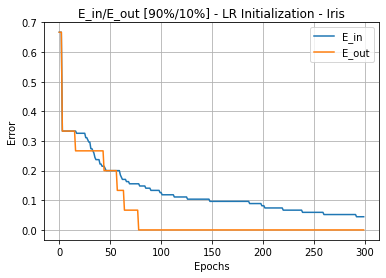

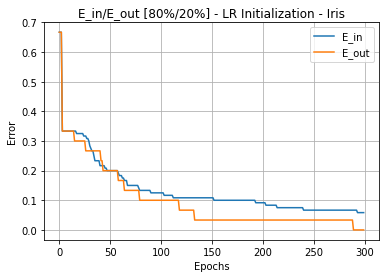

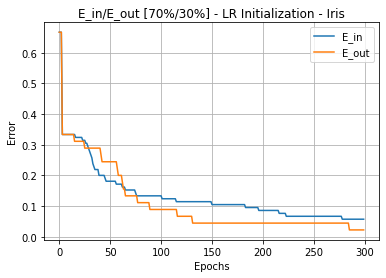

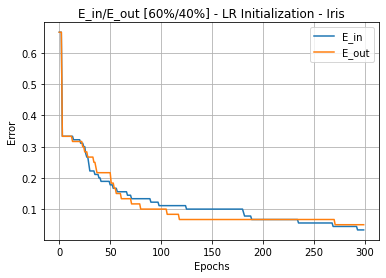

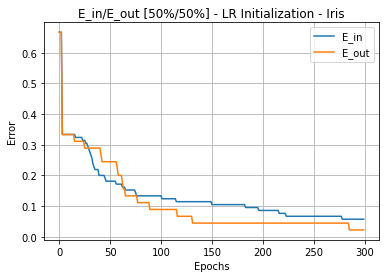

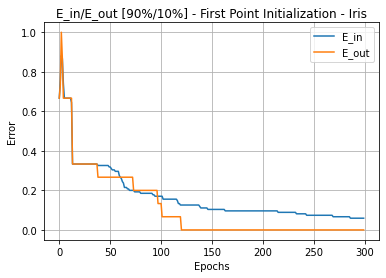

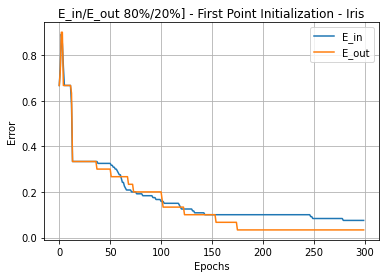

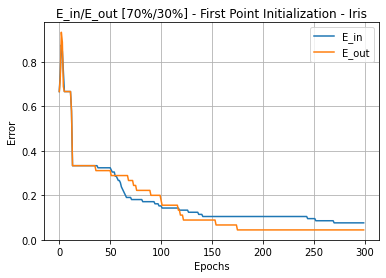

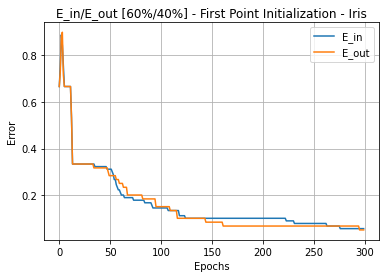

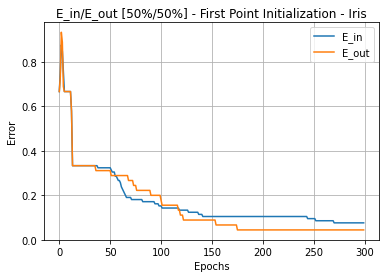

In [20]:
# Plot E_in and E_out as function of iterations 90%/10%
error_plot = plt.figure()
e90_plot = error_plot.add_subplot(111)
e90_plot.plot(E_in[:,0], 1-E_in[:,1],  label='E_in')
e90_plot.plot(E_out[:,0], 1-E_out[:,1],  label='E_out')
e90_plot.set_xlabel('Epochs')
e90_plot.set_ylabel('Error')
e90_plot.set_title('E_in/E_out [90%/10%] - LR Initialization - Iris')
e90_plot.legend()
plt.grid()
plt.show()
error_plot.savefig('E_in_out_LR_90_10_iris.png', dpi=error_plot.dpi)

# Plot E_in and E_out as function of iterations 80%/20%
error_plot = plt.figure()
e80_plot = error_plot.add_subplot(111)
e80_plot.plot(E_in[:,0], 1-E_in[:,2],  label='E_in')
e80_plot.plot(E_out[:,0], 1-E_out[:,2],  label='E_out')
e80_plot.set_xlabel('Epochs')
e80_plot.set_ylabel('Error')
e80_plot.set_title('E_in/E_out [80%/20%] - LR Initialization - Iris')
e80_plot.legend()
plt.grid()
plt.show()
error_plot.savefig('E_in_out_LR_80_20_iris.png', dpi=error_plot.dpi)

# Plot E_in and E_out as function of iterations 70%/30%
error_plot = plt.figure()
e80_plot = error_plot.add_subplot(111)
e80_plot.plot(E_in[:,0], 1-E_in[:,3],  label='E_in')
e80_plot.plot(E_out[:,0], 1-E_out[:,3],  label='E_out')
e80_plot.set_xlabel('Epochs')
e80_plot.set_ylabel('Error')
e80_plot.set_title('E_in/E_out [70%/30%] - LR Initialization - Iris')
e80_plot.legend()
plt.grid()
plt.show()
error_plot.savefig('E_in_out_LR_70_30_iris.png', dpi=error_plot.dpi)

# Plot E_in and E_out as function of iterations 60%/40%
error_plot = plt.figure()
e80_plot = error_plot.add_subplot(111)
e80_plot.plot(E_in[:,0], 1-E_in[:,4],  label='E_in')
e80_plot.plot(E_out[:,0], 1-E_out[:,4],  label='E_out')
e80_plot.set_xlabel('Epochs')
e80_plot.set_ylabel('Error')
e80_plot.set_title('E_in/E_out [60%/40%] - LR Initialization - Iris')
e80_plot.legend()
plt.grid()
plt.show()
error_plot.savefig('E_in_out_LR_60_40_iris.png', dpi=error_plot.dpi)

# Plot E_in and E_out as function of iterations 50%/50%
error_plot = plt.figure()
e80_plot = error_plot.add_subplot(111)
e80_plot.plot(E_in[:,0], 1-E_in[:,3],  label='E_in')
e80_plot.plot(E_out[:,0], 1-E_out[:,3],  label='E_out')
e80_plot.set_xlabel('Epochs')
e80_plot.set_ylabel('Error')
e80_plot.set_title('E_in/E_out [50%/50%] - LR Initialization - Iris')
e80_plot.legend()
plt.grid()
plt.show()
error_plot.savefig('E_in_out_LR_50_50_iris.png', dpi=error_plot.dpi)

##### Initialization using first point

# Plot E_in and E_out as function of iterations 90%/10%
error_plot = plt.figure()
e90_plot_fp = error_plot.add_subplot(111)
e90_plot_fp.plot(E_in_fp[:,0], 1-E_in_fp[:,1],  label='E_in')
e90_plot_fp.plot(E_out_fp[:,0], 1-E_out_fp[:,1],  label='E_out')
e90_plot_fp.set_xlabel('Epochs')
e90_plot_fp.set_ylabel('Error')
e90_plot_fp.set_title('E_in/E_out [90%/10%] - First Point Initialization - Iris')
e90_plot_fp.legend()
plt.grid()
plt.show()
error_plot.savefig('E_in_out_FP_90_10_iris.png', dpi=error_plot.dpi)

# Plot E_in and E_out as function of iterations 80%/20%
error_plot = plt.figure()
e80_plot_fp = error_plot.add_subplot(111)
e80_plot_fp.plot(E_in_fp[:,0], 1-E_in_fp[:,2],  label='E_in')
e80_plot_fp.plot(E_out_fp[:,0], 1-E_out_fp[:,2],  label='E_out')
e80_plot_fp.set_xlabel('Epochs')
e80_plot_fp.set_ylabel('Error')
e80_plot_fp.set_title('E_in/E_out 80%/20%] - First Point Initialization - Iris')
e80_plot_fp.legend()
plt.grid()
plt.show()
error_plot.savefig('E_in_out_FP_80_20_iris.png', dpi=error_plot.dpi)

# Plot E_in and E_out as function of iterations 70%/30%
error_plot = plt.figure()
e70_plot_fp = error_plot.add_subplot(111)
e70_plot_fp.plot(E_in_fp[:,0], 1-E_in_fp[:,3],  label='E_in')
e70_plot_fp.plot(E_out_fp[:,0], 1-E_out_fp[:,3],  label='E_out')
e70_plot_fp.set_xlabel('Epochs')
e70_plot_fp.set_ylabel('Error')
e70_plot_fp.set_title('E_in/E_out [70%/30%] - First Point Initialization - Iris')
e70_plot_fp.legend()
plt.grid()
plt.show()
error_plot.savefig('E_in_out_FP_70_30_iris.png', dpi=error_plot.dpi)

# Plot E_in and E_out as function of iterations 60%/40%
error_plot = plt.figure()
e60_plot_fp = error_plot.add_subplot(111)
e60_plot_fp.plot(E_in_fp[:,0], 1-E_in_fp[:,4],  label='E_in')
e60_plot_fp.plot(E_out_fp[:,0], 1-E_out_fp[:,4],  label='E_out')
e60_plot_fp.set_xlabel('Epochs')
e60_plot_fp.set_ylabel('Error')
e60_plot_fp.set_title('E_in/E_out [60%/40%] - First Point Initialization - Iris')
e60_plot_fp.legend()
plt.grid()
plt.show()
error_plot.savefig('E_in_out_FP_60_40_iris.png', dpi=error_plot.dpi)

# Plot E_in and E_out as function of iterations 50%/50%
error_plot = plt.figure()
e50_plot_fp = error_plot.add_subplot(111)
e50_plot_fp.plot(E_in_fp[:,0], 1-E_in_fp[:,3],  label='E_in')
e50_plot_fp.plot(E_out_fp[:,0], 1-E_out_fp[:,3],  label='E_out')
e50_plot_fp.set_xlabel('Epochs')
e50_plot_fp.set_ylabel('Error')
e50_plot_fp.set_title('E_in/E_out [50%/50%] - First Point Initialization - Iris')
e50_plot_fp.legend()
plt.grid()
plt.show()
error_plot.savefig('E_in_out_PF_50_50_iris.png', dpi=error_plot.dpi)

In [21]:
log_reg = LogisticRegression()

# Let's use a big number of iterations and see how accuracy changes...
# Initialization of first weight uisng linear regression:
w_LR = log_reg.linear_regression(X_iris, Y_iris)

W_models_1 = log_reg.fit_model(X_ir_train1, w_LR, Y_ir_train1, learn_rate=0.1, epochs=3000)
W_models_2 = log_reg.fit_model(X_ir_train2, w_LR, Y_ir_train2, learn_rate=0.1, epochs=3000)
W_models_3 = log_reg.fit_model(X_ir_train3, w_LR, Y_ir_train3, learn_rate=0.1, epochs=3000)
W_models_4 = log_reg.fit_model(X_ir_train4, w_LR, Y_ir_train4, learn_rate=0.1, epochs=3000)
W_models_5 = log_reg.fit_model(X_ir_train5, w_LR, Y_ir_train5, learn_rate=0.1, epochs=3000)

# Initialization of first weight using first data point:
w_FP = X_iris[0]
W_models_fp_1 = log_reg.fit_model(X_ir_train1, w_FP, Y_ir_train1, learn_rate=0.1, epochs=3000)
W_models_fp_2 = log_reg.fit_model(X_ir_train2, w_FP, Y_ir_train2, learn_rate=0.1, epochs=3000)
W_models_fp_3 = log_reg.fit_model(X_ir_train3, w_FP, Y_ir_train3, learn_rate=0.1, epochs=3000)
W_models_fp_4 = log_reg.fit_model(X_ir_train4, w_FP, Y_ir_train4, learn_rate=0.1, epochs=3000)
W_models_fp_5 = log_reg.fit_model(X_ir_train5, w_FP, Y_ir_train5, learn_rate=0.1, epochs=3000)

print("\n ################ Training accuracy with W_LR  ################ ")
print("90%/10%")
log_reg.check_accuracy(X_ir_train1, W_models_1, Y_ir_train1)
print("80%/20%")
log_reg.check_accuracy(X_ir_train2, W_models_2, Y_ir_train2)
print("70%/30%")
log_reg.check_accuracy(X_ir_train3, W_models_3, Y_ir_train3)
print("60%/40%")
log_reg.check_accuracy(X_ir_train4, W_models_4, Y_ir_train4)
print("50%/50%")
log_reg.check_accuracy(X_ir_train5, W_models_5, Y_ir_train5)

print("\n ################ Training accuracy with W_F  ################ ")
print("90%/10%")
log_reg.check_accuracy(X_ir_train1, W_models_fp_1, Y_ir_train1)
print("80%/20%")
log_reg.check_accuracy(X_ir_train2, W_models_fp_2, Y_ir_train2)
print("70%/30%")
log_reg.check_accuracy(X_ir_train3, W_models_fp_3, Y_ir_train3)
print("60%/40%")
log_reg.check_accuracy(X_ir_train4, W_models_fp_4, Y_ir_train4)
print("50%/50%")
log_reg.check_accuracy(X_ir_train5, W_models_fp_5, Y_ir_train5)

# Check accuracy
print("\n ################ Test accuracy with W_LR  ################ ")
print("90%/10%")
log_reg.check_accuracy(X_ir_test1, W_models_1, Y_ir_test1)
print("80%/20%")
log_reg.check_accuracy(X_ir_test2, W_models_2, Y_ir_test2)
print("70%/30%")
log_reg.check_accuracy(X_ir_test3, W_models_3, Y_ir_test3)
print("60%/40%")
log_reg.check_accuracy(X_ir_test4, W_models_4, Y_ir_test4)
print("50%/50%")
log_reg.check_accuracy(X_ir_test5, W_models_5, Y_ir_test5)

print("\n ################ Test accuracy with W_FP  ################ ")
print("90%/10%")
log_reg.check_accuracy(X_ir_test1, W_models_fp_1, Y_ir_test1)
print("80%/20%")
log_reg.check_accuracy(X_ir_test2, W_models_fp_2, Y_ir_test2)
print("70%/30%")
log_reg.check_accuracy(X_ir_test3, W_models_fp_3, Y_ir_test3)
print("60%/40%")
log_reg.check_accuracy(X_ir_test4, W_models_fp_4, Y_ir_test4)
print("50%/50%")
a = log_reg.check_accuracy(X_ir_test5, W_models_fp_5, Y_ir_test5)


 ################ Training accuracy with W_LR  ################ 
90%/10%
Accuracy: 95.55555555555556%
80%/20%
Accuracy: 96.66666666666667%
70%/30%
Accuracy: 96.19047619047619%
60%/40%
Accuracy: 97.77777777777777%
50%/50%
Accuracy: 97.33333333333334%

 ################ Training accuracy with W_F  ################ 
90%/10%
Accuracy: 95.55555555555556%
80%/20%
Accuracy: 96.66666666666667%
70%/30%
Accuracy: 96.19047619047619%
60%/40%
Accuracy: 97.77777777777777%
50%/50%
Accuracy: 97.33333333333334%

 ################ Test accuracy with W_LR  ################ 
90%/10%
Accuracy: 100.0%
80%/20%
Accuracy: 100.0%
70%/30%
Accuracy: 100.0%
60%/40%
Accuracy: 96.66666666666667%
50%/50%
Accuracy: 94.66666666666667%

 ################ Test accuracy with W_FP  ################ 
90%/10%
Accuracy: 100.0%
80%/20%
Accuracy: 100.0%
70%/30%
Accuracy: 100.0%
60%/40%
Accuracy: 96.66666666666667%
50%/50%
Accuracy: 94.66666666666667%
